In [214]:
import pandas as pd
data = pd.read_csv('./data.csv')

data.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,OK never heard of this. cc @traddingtonbear \n...
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@RussInCheshire Shit education system!
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark Sadly very true. We need a big sha...
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,@GoodwinMJ Thanks to institutional racism &amp...
4,464232084,2022-07-29 17:22:27+00:00,32c74076799957c5,1553068448158187520,en,11,0,2,5,Twitter for Android,🚨Job opportunity @ParamedicsUK 🚨\n\nWe need a ...


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27634 entries, 0 to 27633
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author id      27634 non-null  int64 
 1   created_at     27634 non-null  object
 2   geo            27634 non-null  object
 3   id             27634 non-null  int64 
 4   lang           27634 non-null  object
 5   like_count     27634 non-null  int64 
 6   quote_count    27634 non-null  int64 
 7   reply_count    27634 non-null  int64 
 8   retweet_count  27634 non-null  int64 
 9   source         27634 non-null  object
 10  tweet          27634 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.3+ MB


# Data transformation

changing the tweets text to all lower case letters.

In [216]:
data['tweet'] = data['tweet'].astype(str).str.lower()
data.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,@goodwinmj thanks to institutional racism &amp...
4,464232084,2022-07-29 17:22:27+00:00,32c74076799957c5,1553068448158187520,en,11,0,2,5,Twitter for Android,🚨job opportunity @paramedicsuk 🚨\n\nwe need a ...


## Tokenization

Break up the tweets into tokens. Tokens in this context are words, characters, or subwords.

We will use NLTK’s RegexpTokenizer to perform tokenization in combination with regular expressions.

In [217]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

data['text_token']= data['tweet'].apply(regexp.tokenize)
data.head(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, of, this, cc, traddingtonbe..."
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]"
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, very, true, we, need, a, b..."


## Stopwords
Stop words are words in a stop list which are dropped before analysing natural language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, …).

In [218]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [219]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with our own custom stopwords
my_stopwords = ['https', 'http', 'url', 'amp', '&amp']
stopwords.extend(my_stopwords)

# Remove stopwords
data['text_token'] = data['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
data.head(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu..."
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]"
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy..."


## Remove infrequent words
We first change the format of text_token to strings and keep only words which are longer than 2 letters


In [220]:
data['text_string'] = data['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

data[['tweet', 'text_token', 'text_string']].head()

# Create a list of all words
all_words = ' '.join([word for word in data['text_string']])

In [221]:
# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

# Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'education': 18834, 'system': 7427, 'students': 5086, 'school': 2895, 'schools': 2368, 'people': 2366, 'children': 2025, 'one': 1435, 'news': 1427, 'get': 1426, ...})

Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
Since our dataset is really small, we filter out few words and set the value to greater or equal to 2.

In [222]:
data['text_string_fdist'] = data['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
data[['tweet', 'text_token', 'text_string', 'text_string_fdist']].head()


,tweet,text_token,text_string,text_string_fdist
0,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...
1,@russincheshire shit education system!,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system
2,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...
3,@goodwinmj thanks to institutional racism &amp...,"[goodwinmj, thanks, institutional, racism, dis...",goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...
4,🚨job opportunity @paramedicsuk 🚨\n\nwe need a ...,"[job, opportunity, paramedicsuk, need, new, he...",job opportunity paramedicsuk need new head edu...,job opportunity paramedicsuk need new head edu...


## Lemmatization
Next, we perfom lemmatization.
lemmatisation is the algorithmic process of determining the dictionary form of a word based on its intended meaning. 

In [223]:
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [224]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
data['text_string_lem'] = data['text_string_fdist'].apply(wordnet_lem.lemmatize)

# Note that in some datasets, there are no words to lemmatize. We can check this as follows:
# check if the columns are equal
data['is_equal']= (data['text_string_fdist'] == data['text_string_lem'])

# show level count
data.is_equal.value_counts()

True    27634
Name: is_equal, dtype: int64

In [225]:
# check to see the state of our data frame
data

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,True
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system,russincheshire shit education system,True
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,True
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,@goodwinmj thanks to institutional racism &amp...,"[goodwinmj, thanks, institutional, racism, dis...",goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,True
4,464232084,2022-07-29 17:22:27+00:00,32c74076799957c5,1553068448158187520,en,11,0,2,5,Twitter for Android,🚨job opportunity @paramedicsuk 🚨\n\nwe need a ...,"[job, opportunity, paramedicsuk, need, new, he...",job opportunity paramedicsuk need new head edu...,job opportunity paramedicsuk need new head edu...,job opportunity paramedicsuk need new head edu...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27629,96099375,2019-10-01 06:42:24+00:00,7ae9e2f2ff7a87cd,1178923097002577924,en,15,1,3,8,Twitter for Android,'some roles are simply “unlikely to obtain a w...,"[roles, simply, unlikely, obtain, work, permit...",roles simply unlikely obtain work permit says ...,roles simply unlikely obtain work permit says ...,roles simply unlikely obtain work permit says ...,True
27630,19528365,2019-10-01 06:39:32+00:00,604492c5e49c512b,1178922378329546752,en,0,0,0,0,Twitter for Android,so much for #globalbritain https://t.co/xvftov...,"[much, globalbritain, co, xvftovhspp]",much globalbritain xvftovhspp,much globalbritain xvftovhspp,much globalbritain xvftovhspp,True
27631,226565998,2019-10-01 05:15:06+00:00,208d28e57bdc12e9,1178901127221387265,en,2,0,0,0,Twitter for iPhone,parents of year 6 pupils... thinking about #we...,"[parents, year, 6, pupils, thinking, welshmedi...",parents year pupils thinking welshmediumeducat...,parents year pupils thinking welshmediumeducat...,parents year pupils thinking welshmediumeducat...,True
27632,296796716,2019-10-01 04:52:15+00:00,7d7bdec12d2549d4,1178895377778561028,en,11,0,3,3,Twitter for iPhone,announcing another 12 institutes of technology...,"[announcing, another, 12, institutes, technolo...",announcing another institutes technology sign ...,announcing another institutes technology sign ...,announcing another institutes technology sign ...,True


### Wordcloud
We want to see the frequency of the different words present in the dataset 

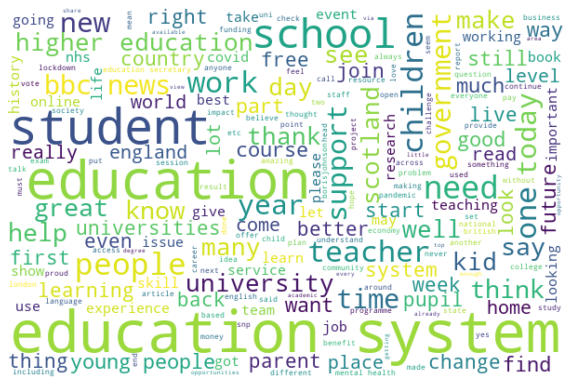

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem = ' '.join([word for word in data['text_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     background_color='white', 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [227]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [228]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

# Most common words
fd.most_common(3)

[('education', 18834), ('system', 7427), ('students', 5086)]

In [229]:
fd.tabulate(5)

education    system  students    school   schools 
    18834      7427      5086      2895      2368 


### Plot common words

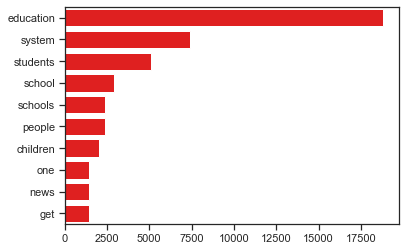

In [230]:
import seaborn as sns
sns.set_theme(style="ticks")

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

sns.barplot(y=fdist.index, x=fdist.values, color='red');


In [231]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

# Sentiment Analysis

We will be using VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

In [232]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [233]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# get polarity
data['polarity'] = data['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
data.tail(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
27631,226565998,2019-10-01 05:15:06+00:00,208d28e57bdc12e9,1178901127221387265,en,2,0,0,0,Twitter for iPhone,parents of year 6 pupils... thinking about #we...,"[parents, year, 6, pupils, thinking, welshmedi...",parents year pupils thinking welshmediumeducat...,parents year pupils thinking welshmediumeducat...,parents year pupils thinking welshmediumeducat...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
27632,296796716,2019-10-01 04:52:15+00:00,7d7bdec12d2549d4,1178895377778561028,en,11,0,3,3,Twitter for iPhone,announcing another 12 institutes of technology...,"[announcing, another, 12, institutes, technolo...",announcing another institutes technology sign ...,announcing another institutes technology sign ...,announcing another institutes technology sign ...,True,"{'neg': 0.172, 'neu': 0.677, 'pos': 0.151, 'co..."
27633,2411542681,2019-10-01 00:08:59+00:00,3b291275e7663301,1178824092885106688,en,1,0,0,0,Twitter for iPhone,last week we held our annual university fair. ...,"[last, week, held, annual, university, fair, l...",last week held annual university fair level fo...,last week held annual university fair level fo...,last week held annual university fair level fo...,True,"{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'comp..."


### Transform data
We now need to tranform our data to be able to perform accurate sentiment analysis

In [234]:
# Change data structure
data = pd.concat(
    [data.drop(['polarity'], axis=1), 
     data['polarity'].apply(pd.Series)], axis=1)
data.head(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,True,0.000,1.000,0.000,0.0000
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system,russincheshire shit education system,True,0.545,0.455,0.000,-0.5574
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,True,0.195,0.519,0.286,0.4767


In [235]:
# Create new variable with sentiment "neutral," "positive" and "negative"
data['sentiment'] = data['compound'].apply(lambda x: 'positive' if x>0 else 'neutral' if x==0 else 'negative')
data.head(4)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,...,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,True,0.000,1.000,0.000,0.0000,neutral
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,...,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system,russincheshire shit education system,True,0.545,0.455,0.000,-0.5574,negative
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,True,0.195,0.519,0.286,0.4767,positive
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,...,"[goodwinmj, thanks, institutional, racism, dis...",goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,True,0.431,0.494,0.075,-0.9287,negative


### Analyze data


In [236]:
# Tweet with highest positive sentiment
data.loc[data['compound'].idxmax()].values

array([575152349, '2022-06-16 18:58:50+00:00', '3206c3452acf92f7',
       1537510025970831361, 'en', 1, 0, 0, 0, 'Twitter for Android',
       'as winners of a charity award last year (best training and education charity) we are attending the charity awards 2022. \n\ngood luck to all the nominated charities. we are delighted to be able to celebrate the incredible work charities do throughout the uk\n\n#charityawards #london https://t.co/elt00ekriw',
       list(['winners', 'charity', 'award', 'last', 'year', 'best', 'training', 'education', 'charity', 'attending', 'charity', 'awards', '2022', 'good', 'luck', 'nominated', 'charities', 'delighted', 'able', 'celebrate', 'incredible', 'work', 'charities', 'throughout', 'uk', 'charityawards', 'london', 'co', 'elt00ekriw']),
       'winners charity award last year best training education charity attending charity awards 2022 good luck nominated charities delighted able celebrate incredible work charities throughout charityawards london elt00

In [237]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
data.loc[data['compound'].idxmin()].values

array([474038706, '2020-08-02 19:46:00+00:00', '20bc436b37c1b13a',
       1290010985428746240, 'en', 1, 0, 1, 0, 'Twitter for iPhone',
       '@casuallyattired @superleague @saints1890 gang crime goes deeper into politics. you have a broken system. bad schools =poor/no education =poor/no jobs = no money =desperate /sad people=drug trade = violence =death . poor housing 4poor people =slums =crime=gangs=violence =death. iyou have no options',
       list(['casuallyattired', 'superleague', 'saints1890', 'gang', 'crime', 'goes', 'deeper', 'politics', 'broken', 'system', 'bad', 'schools', 'poor', 'education', 'poor', 'jobs', 'money', 'desperate', 'sad', 'people', 'drug', 'trade', 'violence', 'death', 'poor', 'housing', '4poor', 'people', 'slums', 'crime', 'gangs', 'violence', 'death', 'iyou', 'options']),
       'casuallyattired superleague saints1890 gang crime goes deeper politics broken system bad schools poor education poor jobs money desperate sad people drug trade violence death poor 

### Visualize data

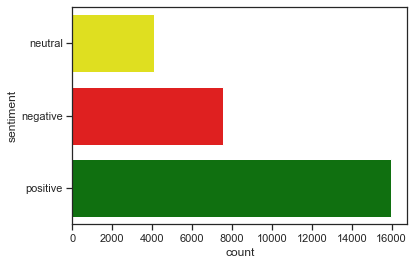

In [241]:

# Number of tweets 
sns.countplot(y='sentiment', 
             data=data, 
             palette=['yellow','red', 'green']
             );

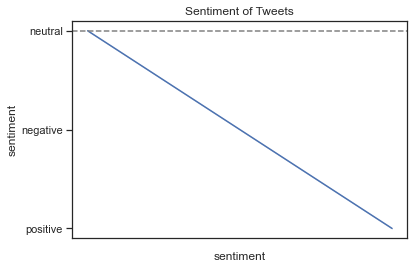

In [239]:
# Lineplot
g = sns.lineplot(x='sentiment', y='sentiment', data=data)

g.set(xticklabels=[])
g.set(title='Sentiment of Tweets')
# g.set(xlabel="Sentiment")
# g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

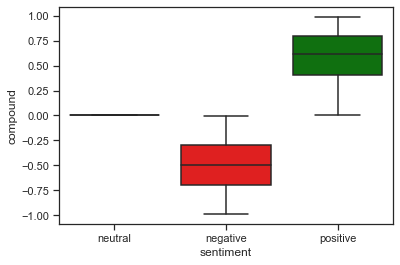

In [240]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['yellow','red', 'green'],
            data=data);